### THE SPARKS FOUNDATION DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 

### TASK-1: Prediction using Supervised Machane Learning (Simple Linear Regression)

#### Author: Ngondzana Tikum Michael

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the fact that he studies for 9.25 hours.

In [70]:
# Importing important libraries

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### Loading the dataset

In [71]:
# Loading the data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

# Viewing the first few rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [72]:
# Knowing our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [73]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


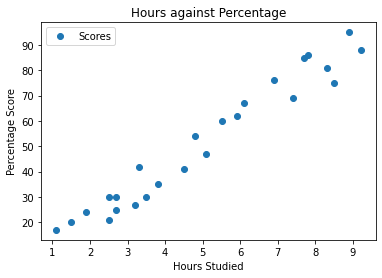

In [74]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours against Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the visualisation, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

In [75]:
# Preparing the x and y variables and displaying the x variable

X = data[['Hours']] 
y = data['Scores']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


### Since we've split aur data into x and y, now we can pass them into the train_test_split function

In [76]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
# print the data
x_train

22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5
Name: Hours, dtype: float64

### Training the Algorithm
#### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [77]:
from sklearn.linear_model import LinearRegression  
crf = LinearRegression()  
crf.fit(X_train, y_train) 

print("Coefficient:\t", crf.coef_)
print("Intercept:\t", crf.intercept_)

print("Training completed.")



Coefficient:	 [9.91065648]
Intercept:	 2.018160041434683
Training completed.


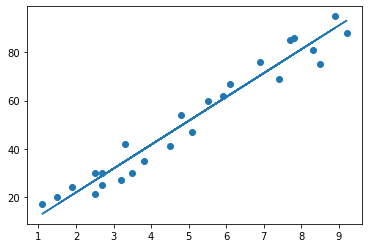

In [78]:
# Plotting the regression line
line = crf.coef_*X+crf.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions
#### Now that we have trained our algorithm, it's time to make some predictions.

In [79]:
# Testing data - In Hours
print(X_test) 

 # Predicting the scores
y_pred = crf.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [80]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [89]:
# Now we can also test with your own data

hours = [[9.25]]
own_pred = crf.predict(hours)
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 93.69173248737538


C:\Users\Ngondzana Michael\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### With 9.25 hours of study per day, a student is expected to achieve a score of 93.69.

### Model Accuracy

In [84]:
# Model accuracy
crf.score(X_train, y_train)

0.9515510725211552

### This implies our mode is accurate up to 95% of the time.

In [85]:
from sklearn import metrics 
print("MAE",metrics.mean_absolute_error(y_test,y_pred))

MAE 4.183859899002975
